In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
v = np.array([0, 1])

# Guardar los vectores transformados
vectores = []

a_vals = np.linspace(0, 1000, 10)
modulos = []

for a in a_vals:
    A = np.array([[1, a],
                  [0, 1]])
    resultado = A @ v
    vectores.append(resultado)
    modulo = np.linalg.norm(resultado)
    modulos.append(modulo)

vectores = np.array(vectores)

# Para colorear según a
colors = plt.cm.viridis((a_vals - a_vals.min()) / (a_vals.max() - a_vals.min()))



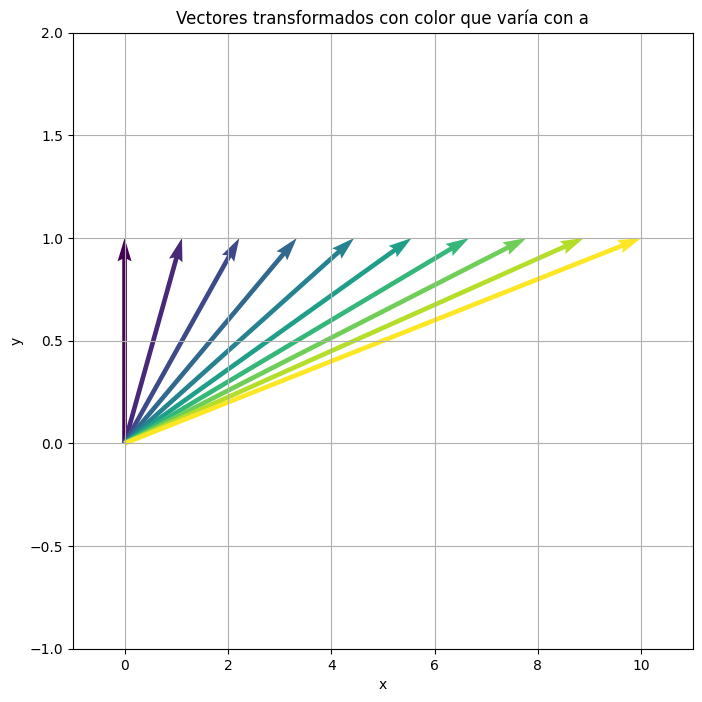

In [17]:
# Puntos de origen
X = np.zeros(len(a_vals))
Y = np.zeros(len(a_vals))

U = vectores[:, 0]
V = vectores[:, 1]

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, color=colors, angles='xy', scale_units='xy', scale=1)

plt.xlim(-1, np.max(U)+1)
plt.ylim(-1, np.max(V)+1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vectores transformados con color que varía con a')
plt.grid(True)
plt.show()


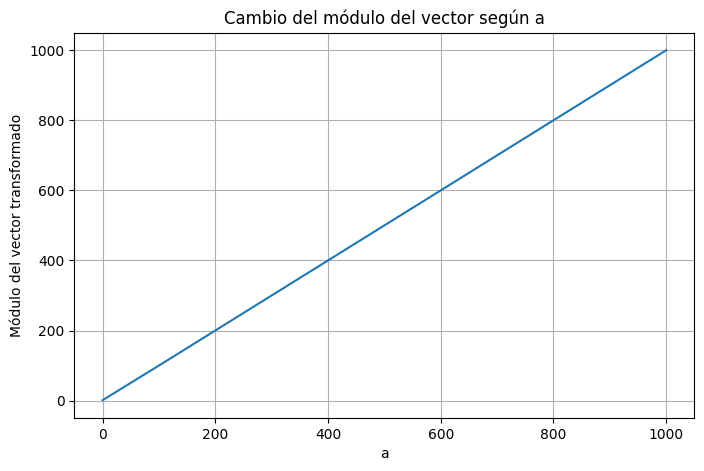

In [20]:

modulos = np.array(modulos)

plt.figure(figsize=(8, 5))
plt.plot(a_vals, modulos)
plt.xlabel('a')
plt.ylabel('Módulo del vector transformado')
plt.title('Cambio del módulo del vector según a')
plt.grid(True)
plt.show()

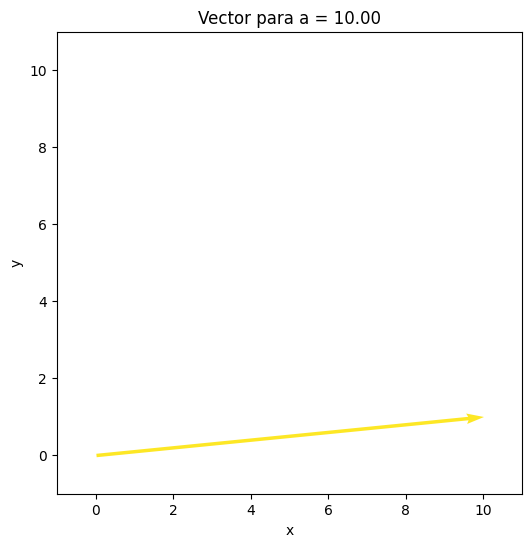

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

v = np.array([0, 1])
a_vals = np.linspace(0, 10, 200)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Animación del vector transformado')

# Crear primer quiver
quiver = ax.quiver(0, 0, 0, 0, angles='xy', scale_units='xy', scale=1)

# Colores normalizados para cada valor de a
colors = plt.cm.viridis((a_vals - a_vals.min()) / (a_vals.max() - a_vals.min()))

def update(frame):
    a = a_vals[frame]
    A = np.array([[1, a],
                  [0, 1]])
    resultado = A @ v

    # Actualizar vector
    quiver.set_UVC(resultado[0], resultado[1])
    # Actualizar color
    quiver.set_color(colors[frame])

    ax.set_title(f'Vector para a = {a:.2f}')
    return quiver,

ani = animation.FuncAnimation(fig, update, frames=len(a_vals), blit=True, interval=50)

# Guardar animación
ani.save('animacion_vectores.gif', writer='pillow', fps=60)

plt.show()
